### scrap

In [1]:
import numpy as np 

In [5]:
data = np.load('/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_processed.npy',allow_pickle=True)

OSError: Failed to interpret file '/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_processed.npy' as a pickle

In [6]:
np.loadtxt('/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_processed.npy', delimiter=',')

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: loadtxt: Empty input file: "/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_processed.npy"
  """Entry point for launching an IPython kernel.


array([], dtype=float64)

In [7]:

from __future__ import print_function
from scipy.spatial import ConvexHull
from skimage.transform import downscale_local_mean
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from skimage.measure import regionprops
import numpy as np
import matplotlib.pyplot as plt
import os as os
from tqdm import tqdm as tqdm_base
def tqdm(*args, **kwargs):
    if hasattr(tqdm_base, '_instances'):
        for instance in list(tqdm_base._instances):
            tqdm_base._decr_instances(instance)
    return tqdm_base(*args, **kwargs)
from scipy.io import loadmat
import numpy as np
import pandas as pd


# define functions

# function from here: https://github.com/weallen/STARmap/blob/master/python/analysis.py
def load_data(data_dir, prefix="Cell"):
        #expr = pd.read_csv(os.path.join(data_dir, "data_table.csv"), index_col=0)
    expr = pd.read_csv(os.path.join(data_dir, "cell_barcode_count.csv"), header=None)
    gene_names = pd.read_csv(os.path.join(data_dir, "cell_barcode_names.csv"),header=None)
    rownames = [i for i in range(expr.shape[0])]
    names = gene_names[2]
    names.name = "Gene"
    return pd.DataFrame(data=expr.values, columns=names, index=rownames)

# function from https://github.com/weallen/STARmap/blob/master/python/viz.py
def GetQHulls(labels):
    labels += 1
    Nlabels = labels.max()
    hulls = []
    coords = []
    num_cells = 0
    #cell_id = []
    #print('blah')
    for i in tqdm(range(Nlabels)):#enumerate(regionprops(labels)):
        #print(i,"/",Nlabels)
        curr_coords = np.argwhere(labels==i) # get all coordinates for a single cell label
        # size threshold of > 100 pixels and < 100000
        if curr_coords.shape[0] < 100000 and curr_coords.shape[0] > 1000: # if the cell shape is within threshold region, save the coordinates
            num_cells += 1
            hulls.append(ConvexHull(curr_coords))
            coords.append(curr_coords)
        #cell_id = np.append(cell_id, i)
    #print("Used %d / %d" % (num_cells, Nlabels))
    return hulls, coords

## my functions:
def normalize(counts):

    cts = np.array(counts)
    cts = cts[np.array(np.where(np.sum(cts, axis = 1)!=0)).flatten(),:] # remove cells, where total library count is zero
    cell_median = np.median(cts, axis = 1) # get row-wise median
    cell_sum = np.sum(cts, axis = 1) # get row-wise sum
    counts_out = cts/(np.tile(cell_sum, (cts.shape[1],1)).transpose()) # divide each column by row-wise sum

    return counts_out

def process_2D(data_dir, gene_names,i):

    # load data
    image = np.load(os.path.join(data_dir,'labels.npz'))["labels"]
    counts = load_data(data_dir, prefix="")

    # process counts
    normalized_counts = pd.DataFrame(normalize(counts)) # normalize counts
    normalized_counts.columns = counts.columns
    normalized_counts = normalized_counts.reindex(columns = sorted(gene_names))
    normalized_counts = np.array(normalized_counts.fillna(0))

    # get coords
    qhulls,coords = GetQHulls(image)# get all coordinates corresponding to single cell
    all_centroids  = np.vstack([np.append(c.mean(0),(0,i)) for c in coords]) # centroids are the average coordinates
    counts_and_coords = np.concatenate((normalized_counts, all_centroids.astype('int')[range(normalized_counts.shape[0]),:]), axis = 1) # concat counts and coords

    return counts_and_coords

#def process_3D()

#  get union of all gene names (across 3D and 2D datasets)
genenames_3D = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/sequentially_encoded_Wang_et_al_2018/gene_names.csv', header = 0)

dirs = os.listdir('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets')

ct = []

for i in range(len(dirs)):

    data_dir1 = os.path.join('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets',dirs[i])

    ct.append(load_data(data_dir1, prefix=""))

genenames = []
for i in range(len(dirs)):
    genenames.append(ct[i].columns)

all_genes = np.unique(np.concatenate((np.unique(np.concatenate(genenames)),(np.array(genenames_3D).flatten()))))


In [8]:
data_out = []

for i in range(len(dirs)):
    data_dir = os.path.join('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/all_datasets',dirs[i])
    data_out.append(process_2D(data_dir, all_genes,i))

 19%|█▊        | 182/975 [00:33<02:26,  5.42it/s]


KeyboardInterrupt: 

In [10]:
np.save('d.npy',data_out)

In [16]:
np.load('d.npy', allow_pickle=True)

array([array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.95100000e+03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.96900000e+03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        2.80400000e+03, 0.00000000e+00, 0.00000000e+00],
       ...,
       [0.00000000e+00, 0.00000000e+00, 3.64963504e-03, ...,
        2.92600000e+03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 3.12500000e-03, ...,
        9.16500000e+03, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
        1.09910000e+04, 0.00000000e+00, 0.00000000e+00]]),
       array([[0.000e+00, 0.000e+00, 0.000e+00, ..., 6.200e+03, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 8.410e+02, 0.000e+00,
        1.000e+00],
       [0.000e+00, 0.000e+00, 0.000e+00, ..., 1.800e+02, 0.000e+00,
        1.000e+00],


In [17]:
curr = data_out[0]

In [25]:
curr[:,curr.shape[1]-3]

array([ 1951.,  2969.,  2804., ...,  2926.,  9165., 10991.])

array([0.      , 0.      , 0.      , ..., 0.      , 0.003125, 0.      ])

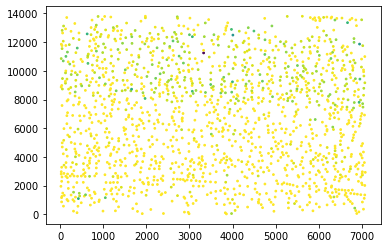

In [58]:

plt.scatter(curr[:,curr.shape[1]-4],curr[:,curr.shape[1]-3], c = np.array(curr[:,np.argwhere(all_genes=='Cux2')]).flatten(), cmap='viridis_r', s = 3)

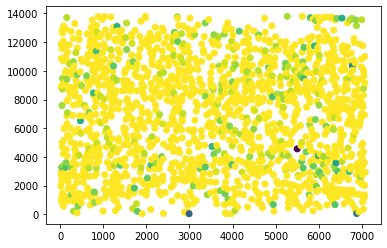

In [56]:
plt.scatter(curr[:,curr.shape[1]-4],curr[:,curr.shape[1]-3], c = np.array(curr[:,np.argwhere(all_genes=='Tpbg')]).flatten(), cmap='viridis_r')

In [60]:
labs = pd.read_csv('/Users/work/Documents/GitHub/mlgenomics/data_as_downloaded/combinatorially_encoded/visual_1020/20180505_BY3_1kgenes/class_labels.csv')

In [67]:
np.array(labs[['ClusterName']])

array([[nan],
       [nan],
       [nan],
       ...,
       ['Smc'],
       [nan],
       ['Astro-2']], dtype=object)

In [62]:
curr.shape

(1549, 1034)

In [64]:
c = curr[range(labs.shape[0]),:]

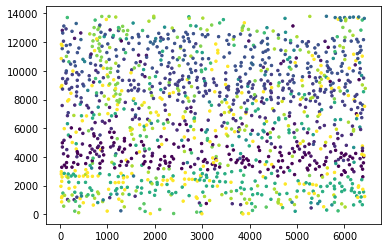

In [101]:
plt.scatter(c[:,c.shape[1]-4],c[:,c.shape[1]-3],c = np.array(ttt).astype('float'),cmap='viridis_r', s = 6)

In [112]:
df = pd.concat([pd.DataFrame(c[:,(c.shape[1]-4):(c.shape[1]-2)]), labs[['ClusterName']]],axis=1)

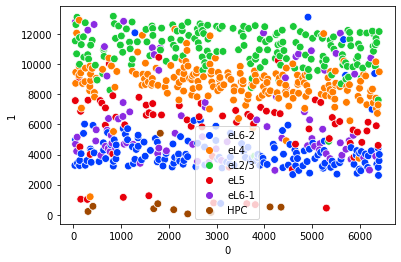

In [180]:
import seaborn as sns
sns.scatterplot(data=df, x=0, y=1, hue=f,palette= sns.color_palette("bright", 6),s =60)


In [76]:
res = dict(zip(np.d(list(np.array(labs[['ClusterName']]).flatten())), list(range(len(np.unique(list(np.array(labs[['ClusterName']]).flatten()))))))) 

In [170]:
pd.unique(f)

array([nan, 'eL6-2', 'eL4', 'eL2/3', 'eL5', 'eL6-1', 'HPC'], dtype=object)

In [145]:
pd.unique(df[['ClusterName']])

ValueError: could not broadcast input array from shape (1389,1) into shape (1389)

In [178]:
s = set(('Astro-1',
 'Astro-2',
 'Endo',
 'Micro',
 'Oligo',
 'PVALB',
 'Reln',
 'SST',
 'Smc',
 'VIP'))

In [179]:
l = df['ClusterName'].to_list()
f = [np.nan if item in s else item for item in l]

In [86]:
k = list(np.array(labs[['ClusterName']]).flatten())

In [91]:
 tt = list( map(res.get, k) )
    
ttt = [-1 if item is None else item for item in tt]

In [182]:
data = np.load('/Users/work/Documents/GitHub/mlgenomics/data_preprocessing/Wang_2018_all_2D_processed.npy', allow_pickle=True)

In [192]:
dd = all_data.loc[:,range(1030,1034)]

dd.head

<bound method NDFrame.head of           1030     1031  1032  1033
0         19.0   1951.0   0.0   0.0
1         27.0   2969.0   0.0   0.0
2         26.0   2804.0   0.0   0.0
3         24.0   8867.0   0.0   0.0
4         26.0  10853.0   0.0   0.0
5         34.0   1160.0   0.0   0.0
6         35.0    866.0   0.0   0.0
7         36.0   2300.0   0.0   0.0
8         49.0   4980.0   0.0   0.0
9         53.0   8729.0   0.0   0.0
10        29.0  11854.0   0.0   0.0
11        38.0   8978.0   0.0   0.0
12        46.0  11547.0   0.0   0.0
13        43.0   1247.0   0.0   0.0
14        37.0   3280.0   0.0   0.0
15        45.0   7582.0   0.0   0.0
16        50.0   4691.0   0.0   0.0
17        44.0   2603.0   0.0   0.0
18        44.0  11758.0   0.0   0.0
19        48.0  12817.0   0.0   0.0
20        91.0   3426.0   0.0   0.0
21        84.0   5157.0   0.0   0.0
22        61.0   1480.0   0.0   0.0
23        55.0   9461.0   0.0   0.0
24        58.0  12633.0   0.0   0.0
25        73.0  10688.0   0.0   0.

In [186]:
all_data.head()

,0,1,2,3,4,5,6,7,8,9,...,1024,1025,1026,1027,1028,1029,1030,1031,1032,1033
0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.083333,0.0,0.000000,0.0,0.000000,19.0,1951.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.012048,0.0,0.000000,27.0,2969.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,26.0,2804.0,0.0,0.0
3,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.0,0.000000,24.0,8867.0,0.0,0.0
4,0.0,0.0,0.0,0.005917,0.0,0.0,0.0,0.0,0.0,0.0,...,0.005917,0.000000,0.0,0.000000,0.0,0.005917,26.0,10853.0,0.0,0.0


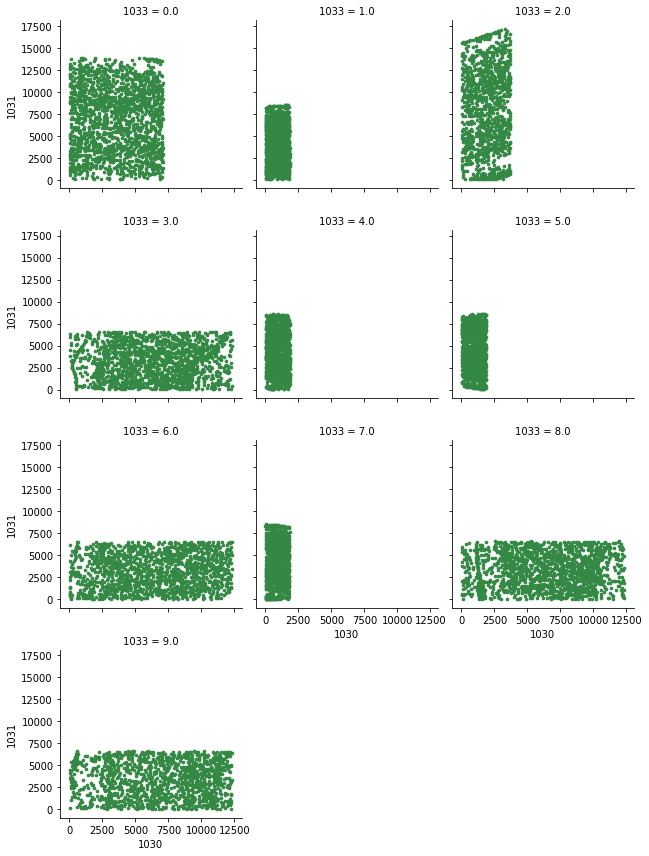

In [203]:
g = sns.FacetGrid(dd, col=1033, margin_titles=True, height=3,  col_wrap=3)
g.map(plt.scatter, 1030, 1031, color="#338844",  s=7, lw=1)

In [204]:
dirs

['20180505_BY3_1kgenes',
 '20171110_BF2_dark',
 '20180410-BY3_1kgenes',
 '20180421_BZ19_cocaine',
 '20170915_BD2_dark',
 '20171115_BF5_light',
 '20180424_BZ14_control',
 '20171120_BF4_light',
 '20180419_BZ9_control',
 '20180417_BZ5_control']